# **Normalization vs Standardization**
The two most important feature scaling techniques

- In Machine Learning, a model will be as good (or as bad) as the data you train the model with.
- The magnitude of different features affects different machine learning models for various reasons.

- For example,
- consider a data set containing two features, ``age``, and ``income``.
- Here age ranges from 0–100, while income ranges from 0 to a huge amount which is mostly higher than 100.
- ``Income`` is about ``1,000`` ``times`` ``larger`` ``than age``. 
- So, these two features are in very different ranges. 
- When we do further analysis, like multivariate linear regression,
- for example, the attributed ``income`` will ``intrinsically influence`` the **``result``** ``more`` ``due`` to its ``larger value``.
- But this doesn’t necessarily mean it is more important as a predictor.


- Therefore, the range of all features should be scaled so that each feature contributes approximately proportionately to the final distance.

For this exact purpose, using Feature Scaling is essential.

- ***Feature scaling***

* Feature scaling is a technique to change the values of numeric columns in the
* dataset within a  common scale,
* without distorting differences in the ranges of values or losing information.

Why use Feature Scaling?

- Gradient descent converges much faster with feature scaling than without it.

- Many classifiers (like KNN, K-means) calculate the distance between two points by the Euclidean distance.
- If one of the features has a broad range of values, the distance will be governed by this particular feature.
- So the range of features should be scaled so that each feature contributes approximately proportionately to the final distance.


- However, ``every dataset does not require features scaling``.
- It is required only when features have different ranges.


# Normalization
- Normalization (also called, Min-Max normalization) is a scaling technique
- such that when it is applied the features will be rescaled so that the data will fall
- in the range of [0,1]


The mathematical formula for Normalization

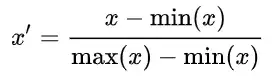
Here ‘x’ is the original value and ‘x`’ is the normalized value.

# Standardization
- It is calculated based on standard normal distribution
- where , miu that is mean = 0 and std = 1
- Standardization (also called, Z-score normalization) is a scaling technique
- such that when it is applied the features will be - rescaled 
- so that they’ll have the properties
- of a standard normal distribution with mean,μ=0 and standard deviation, σ=1;
- where μ is the mean (average) and σ is the standard deviation from the mean.

Standard scores (also called z scores) of the samples are calculated as follows:

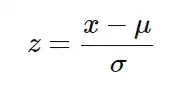
This scales the features in a way that they range between [-1,1]

# Implementation

**About the dataset:**

- This data set is the result of a chemical analysis of wines grown in the same region
- in Italy but derived from three different cultivars.
- The analysis determined the quantities of 13 constituents found 
- in each of the three types of wines.

In [1]:
import pandas as pd

In [8]:
wine = pd.read_csv("Wine.csv",usecols=[0,1,2])
wine.rename(columns={'1':'Class','14.23':'Alcohol','1.71':'Malic'},inplace=True)

In [9]:
wine.head()

,Class,Alcohol,Malic
0,1,13.20,1.78
1,1,13.16,2.36
2,1,14.37,1.95
3,1,13.24,2.59
4,1,14.20,1.76


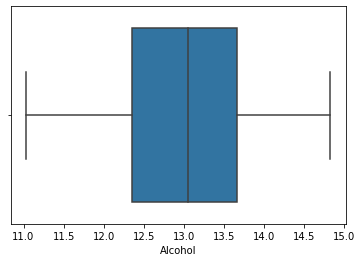

In [13]:
import seaborn as sns
sns.boxplot(x='Alcohol',data=wine);

feature alcohol range from 11–15

In [14]:
wine['Alcohol'].describe()

count    177.000000
mean      12.993672
std        0.808808
min       11.030000
25%       12.360000
50%       13.050000
75%       13.670000
max       14.830000
Name: Alcohol, dtype: float64

minimum value around 11.03 and maximum value around 14.83

<AxesSubplot:xlabel='Malic'>

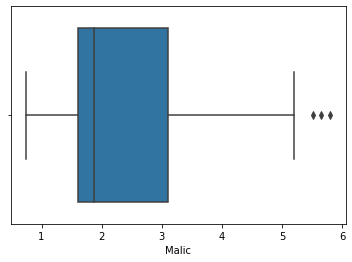

In [16]:
sns.boxplot(x='Malic', data=wine)

features malic lie in the range of 1–6 with few outliers.

In [18]:
wine['Malic'].describe()

count    177.000000
mean       2.339887
std        1.119314
min        0.740000
25%        1.600000
50%        1.870000
75%        3.100000
max        5.800000
Name: Malic, dtype: float64

Observations:

- Feature alcohol ranges between [11,15]
- Feature malic ranges in [0.5,6]
- When we perform a machine learning algorithm (like KNN)
- in which distances are considered, 
- the model will be biased to the feature, alcohol.
- Hence, Feature scaling is necessary for this data set.

Let us now perform normalization and standardization

# **Applying Normalization**

In [19]:
from sklearn.preprocessing import MinMaxScaler

Normalization can be achieved using MinMaxScaler.

In [21]:
# object of MinMaxScaler
m = MinMaxScaler()

In [25]:
new_wine = m.fit_transform(wine[["Alcohol",'Malic']])

In [59]:
print('Min-value after normalization:\nAlcohol={}, Malic acid={}'.format(new_wine[:,0].min(), new_wine[:,1].min()))
print("--"*15)
print('Max-value after normalization:\nAlcohol={}, Malic acid={}'.format(new_wine[:,0].max(), new_wine[:,1].max()))

Min-value after normalization:
Alcohol=0.0, Malic acid=0.0
------------------------------
Max-value after normalization:
Alcohol=1.0, Malic acid=1.0


**rescaled**

# Applying Standardization

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
# obj of StandardScaler
s = StandardScaler()

In [63]:
new_wine = s.fit_transform(wine[['Alcohol','Malic']])

In [77]:
print("Mean Value after standardization:\nAlcohol {:.2f} Malic {:.2f}".format(new_wine[:,0].mean(),new_wine[:,1].mean()))
print("--"*18)
print("Standard_deviation Value after standardization:\nAlcohol {:.2f} Malic {:.2f}".format(new_wine[:,1].std(),new_wine[:,1].std()))

Mean Value after standardization:
Alcohol -0.00 Malic 0.00
------------------------------------
Standard_deviation Value after standardization:
Alcohol 1.00 Malic 1.00


# When to use what?

``“ Normalization or Standardization?”`` 
- There is no obvious answer to this question: it really depends on the application.

- For example, in clustering analyses, standardization may be especially
- crucial in order to compare similarities between features based on certain distance measures.
- Another prominent example is the Principal Component Analysis,
- where we usually prefer standardization over
- normalization since we are interested in the components that maximize the variance.



- However, this doesn’t mean that normalization is not useful at all!
- A popular application is image processing, where pixel intensities 
- have to be normalized to fit within a certain range (i.e., 0 to 255 for the RGB color range).
- Also, a typical neural network algorithm requires data on a 0–1 scale.